In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA ##

In [5]:
df = pd.read_csv('NBA_Dataset.csv')
print(df.head())

   season               player pos  age team_id   g  gs  mp_per_g  fg_per_g  \
0    1982  Kareem Abdul-Jabbar   C   34     LAL  76  76      35.2       9.9   
1    1982          Alvan Adams   C   27     PHO  79  75      30.3       6.4   
2    1982         Mark Aguirre  SF   22     DAL  51  20      28.8       7.5   
3    1982          Danny Ainge  SG   22     BOS  53   1      10.6       1.5   
4    1982       Tiny Archibald  PG   33     BOS  68  51      31.9       4.5   

   fga_per_g  ...    ws  ws_per_48  obpm  dbpm  bpm  vorp  award_share   mov  \
0       17.1  ...  10.7      0.192   3.8   1.2  5.0   4.7        0.045  4.87   
1       13.0  ...   7.2      0.144   1.4   2.2  3.6   3.4        0.000  3.45   
2       16.1  ...   1.9      0.061   2.3  -1.6  0.7   1.0        0.000 -4.43   
3        4.2  ...   0.5      0.042  -3.7   1.0 -2.7  -0.1        0.000  6.38   
4        9.6  ...   5.2      0.115   1.4  -1.3  0.1   1.1        0.000  6.38   

   mov_adj  win_loss_pct  
0     4.37       

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17697 entries, 0 to 17696
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17697 non-null  int64  
 1   player            17697 non-null  object 
 2   pos               17697 non-null  object 
 3   age               17697 non-null  int64  
 4   team_id           17697 non-null  object 
 5   g                 17697 non-null  int64  
 6   gs                17697 non-null  int64  
 7   mp_per_g          17697 non-null  float64
 8   fg_per_g          17697 non-null  float64
 9   fga_per_g         17697 non-null  float64
 10  fg_pct            17634 non-null  float64
 11  fg3_per_g         17697 non-null  float64
 12  fg3a_per_g        17697 non-null  float64
 13  fg3_pct           15074 non-null  float64
 14  fg2_per_g         17697 non-null  float64
 15  fg2a_per_g        17697 non-null  float64
 16  fg2_pct           17591 non-null  float6

In [8]:
print(df.isnull().sum())


season                 0
player                 0
pos                    0
age                    0
team_id                0
g                      0
gs                     0
mp_per_g               0
fg_per_g               0
fga_per_g              0
fg_pct                63
fg3_per_g              0
fg3a_per_g             0
fg3_pct             2623
fg2_per_g              0
fg2a_per_g             0
fg2_pct              106
efg_pct               63
ft_per_g               0
fta_per_g              0
ft_pct               576
orb_per_g              0
drb_per_g              0
trb_per_g              0
ast_per_g              0
stl_per_g              0
blk_per_g              0
tov_per_g              0
pf_per_g               0
pts_per_g              0
mp                     0
per                    3
ts_pct                55
fg3a_per_fga_pct      63
fta_per_fga_pct       63
orb_pct                3
drb_pct                3
trb_pct                3
ast_pct                3
stl_pct                3


In [23]:
df[df['ft_pct'].isna()]['fta_per_g']
df[df['fg3_pct'].isna()]['fg3a_per_g']

5        0.0
6        0.0
7        0.0
12       0.0
21       0.0
        ... 
17620    0.0
17621    0.0
17622    0.0
17670    0.0
17696    0.0
Name: fg3a_per_g, Length: 2623, dtype: float64

In [22]:
df.fillna(0)
df.drop()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


In [32]:
df_MVPVotes = df[df["award_share"] > 0]
df_noMVPVotes = df[df["award_share"] == 0]


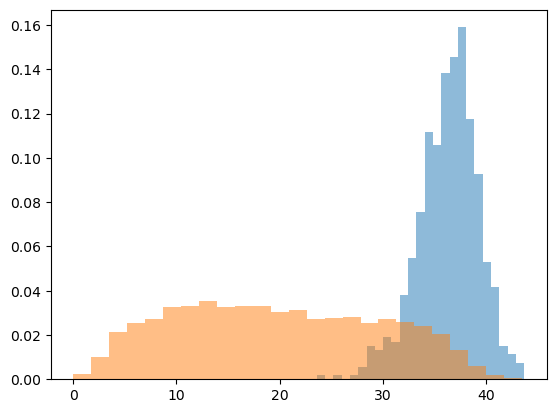

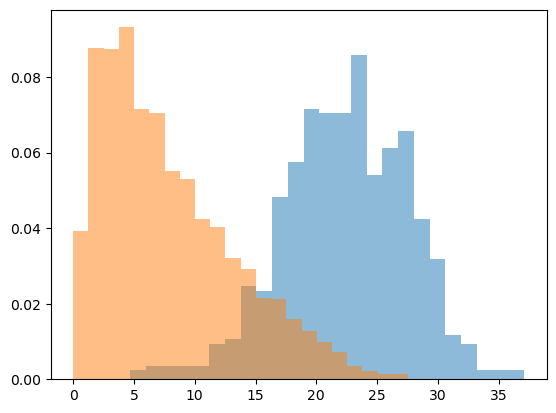

In [34]:
plt.hist(df_MVPVotes["mp_per_g"], bins = 25, alpha = 0.5, density = True)
plt.hist(df_noMVPVotes["mp_per_g"], bins = 25, alpha = 0.5, density = True)
plt.show()
plt.hist(df_MVPVotes["pts_per_g"], bins = 25, alpha = 0.5, density = True)
plt.hist(df_noMVPVotes["pts_per_g"], bins = 25, alpha = 0.5, density = True)
plt.show()